In [1]:
import sys
sys.path.append('/project/FoolingDetection/pytorch')

import importlib
import lib.VisualizationProvider
import lib.FeatureProvider
import lib.StaticMetricProvider
importlib.reload(lib.VisualizationProvider)
importlib.reload(lib.FeatureProvider)
importlib.reload(lib.StaticMetricProvider)

from lib.VisualizationProvider import (plot_2d_distributions, 
                                       plot_scatter, 
                                       plot_gaussian_distributions,
                                       plot_heatmap,
                                       plot_comparison_heatmaps
                                      )

from lib.FeatureProvider import (load_all_grids, 
                                 load_all_grids_randparams,
                                 reduce_dimensionality_umap, 
                                 reduce_dimensionality_kpca, 
                                 reduce_dimensionality_tsne
                                )

from lib.StaticMetricProvider import (test_all_introspection_technique_combinations, 
                                      calc_distributions, 
                                      get_values_from_distance_matrix, 
                                      difference_distances, 
                                      apply_log_to_distances
                                     )
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

2023-11-01 13:44:37.171263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 13:44:47.361351: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-12.0/lib64
2023-11-01 13:44:47.361482: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/pyt

# mnist@MLP

In [2]:
MODEL_TYPE = "mlp"
DATASET = "mnist"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams/Cascading/4_Linear"
MAX_IMAGES = 300
NUMBER_COMPONENTS = 2
RANDOM_STATE = 42

In [ ]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)

all_grids_3 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

distances_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_3, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_3, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)

difference_NoAttacked_RandLabels = difference_distances(
    reference=distances_1, 
    delta=distances_2, 
    fold_change_and_log_scale=True
)

difference_NoAttacked_RandParams = difference_distances(
    reference=distances_1, 
    delta=distances_3, 
    fold_change_and_log_scale=True
)

Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 o

## Heatmaps

In [ ]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_2, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandLabels High Dim"
)

In [ ]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_3, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandParams High Dim"
)

# mnist@CNN

In [ ]:
MODEL_TYPE = "cnn"
DATASET = "mnist"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams/Cascading/20_Conv2d"
MAX_IMAGES = 300
NUMBER_COMPONENTS = 2
RANDOM_STATE = 42

In [7]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)

all_grids_3 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

distances_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_3, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_3, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)

difference_NoAttacked_RandLabels = difference_distances(
    reference=distances_1, 
    delta=distances_2, 
    fold_change_and_log_scale=True
)

difference_NoAttacked_RandParams = difference_distances(
    reference=distances_1, 
    delta=distances_3, 
    fold_change_and_log_scale=True
)

## Heatmaps

----------------------------------------------------------------------------------------------------
Distance function: ssim


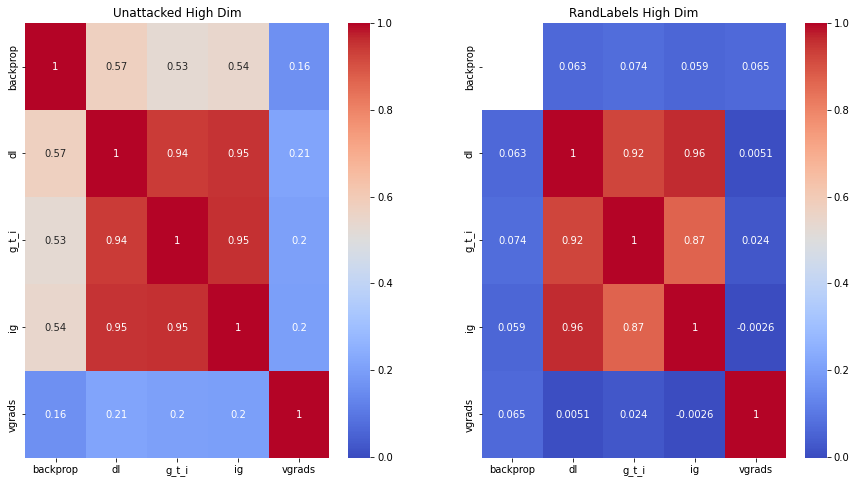

----------------------------------------------------------------------------------------------------


In [8]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_2, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandLabels High Dim"
)

----------------------------------------------------------------------------------------------------
Distance function: ssim


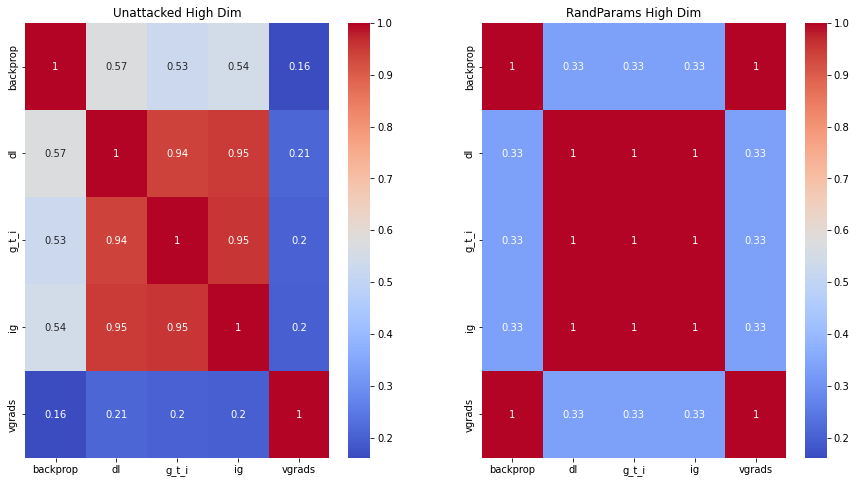

----------------------------------------------------------------------------------------------------


In [9]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_3, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandParams High Dim"
)

# cifar10@MLP

In [10]:
MODEL_TYPE = "mlp"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams/Cascading/4_Linear"
MAX_IMAGES = 300
NUMBER_COMPONENTS = 2
RANDOM_STATE = 42

In [11]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)

all_grids_3 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

distances_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_3, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_3, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)

difference_NoAttacked_RandLabels = difference_distances(
    reference=distances_1, 
    delta=distances_2, 
    fold_change_and_log_scale=True
)

difference_NoAttacked_RandParams = difference_distances(
    reference=distances_1, 
    delta=distances_3, 
    fold_change_and_log_scale=True
)

Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 o

## Heatmaps

----------------------------------------------------------------------------------------------------
Distance function: ssim


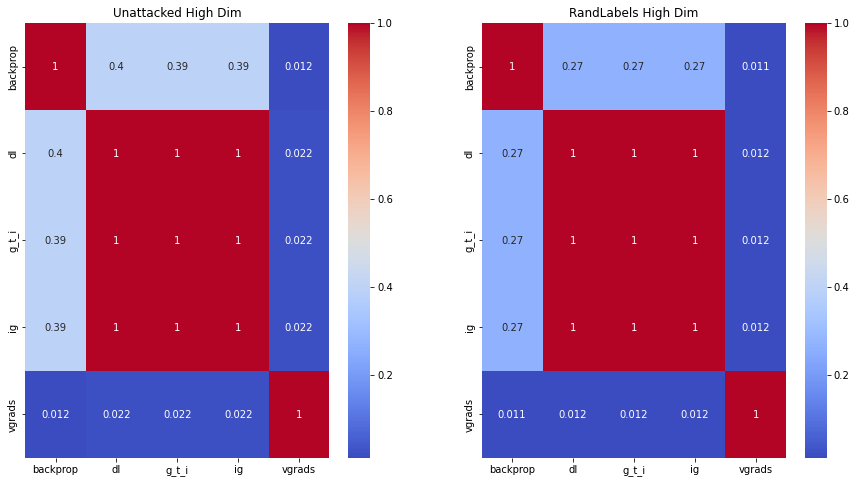

----------------------------------------------------------------------------------------------------


In [12]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_2, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandLabels High Dim"
)

----------------------------------------------------------------------------------------------------
Distance function: ssim


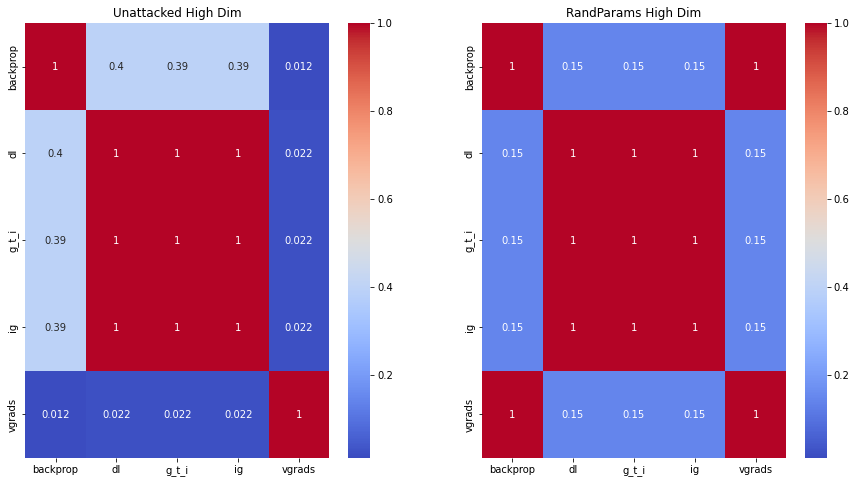

----------------------------------------------------------------------------------------------------


In [13]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_3, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandParams High Dim"
)

# cifar10@CNN

In [14]:
MODEL_TYPE = "cnn"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams/Cascading/8_Conv2d"
MAX_IMAGES = 300
NUMBER_COMPONENTS = 2
RANDOM_STATE = 42

In [15]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)

all_grids_3 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

distances_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)
distances_3, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_3, 
    print_results=False, 
    average_results=True,
    use_ssim=True
)

difference_NoAttacked_RandLabels = difference_distances(
    reference=distances_1, 
    delta=distances_2, 
    fold_change_and_log_scale=True
)

difference_NoAttacked_RandParams = difference_distances(
    reference=distances_1, 
    delta=distances_3, 
    fold_change_and_log_scale=True
)

Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 out of 300 (100.00%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading image 250 out of 300 (83.33%)
Loading image 300 o

## Heatmaps

In [16]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_2, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandLabels High Dim"
)

----------------------------------------------------------------------------------------------------
Distance function: ssim


ValueError: Shape of passed values is (5, 5), indices imply (8, 8)

In [ ]:
plot_comparison_heatmaps(
    distances1=distances_1, 
    distances2=distances_3, 
    introspection_techniques=techniques, 
    distance_functions=["ssim"], 
    use_diverging=True, 
    title_distances1="Unattacked High Dim",
    title_distances2="RandParams High Dim"
)